## Interpolating real data

##### Go through the [Interpolation Guide](https://github.com/tww-carleton/geodac-2022/blob/main/notebooks/InterpolationGuide.ipynb) before this challenge!

In [1]:
#importing libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# You can use your own data files 

import xarray as xr
ds  = xr.load_dataset('air.sig995.1948.nc').isel(time=0)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 1948-01-01
Data variables:
    air      (lat, lon) float32 237.1 237.1 237.1 237.1 ... 255.2 255.2 255.2
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC reanalysis (1948)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    history:        created 99/05/11 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

C:\ProgramData\Anaconda3\envs\GEODACenv\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\ProgramData\Anaconda3\envs\GEODACenv\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\ProgramData\Anaconda3\envs\GEODACenv\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\ProgramData\Anaconda3\envs\GEODACenv\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Inde

Text(0.5, 1.0, 'Interpolated data')

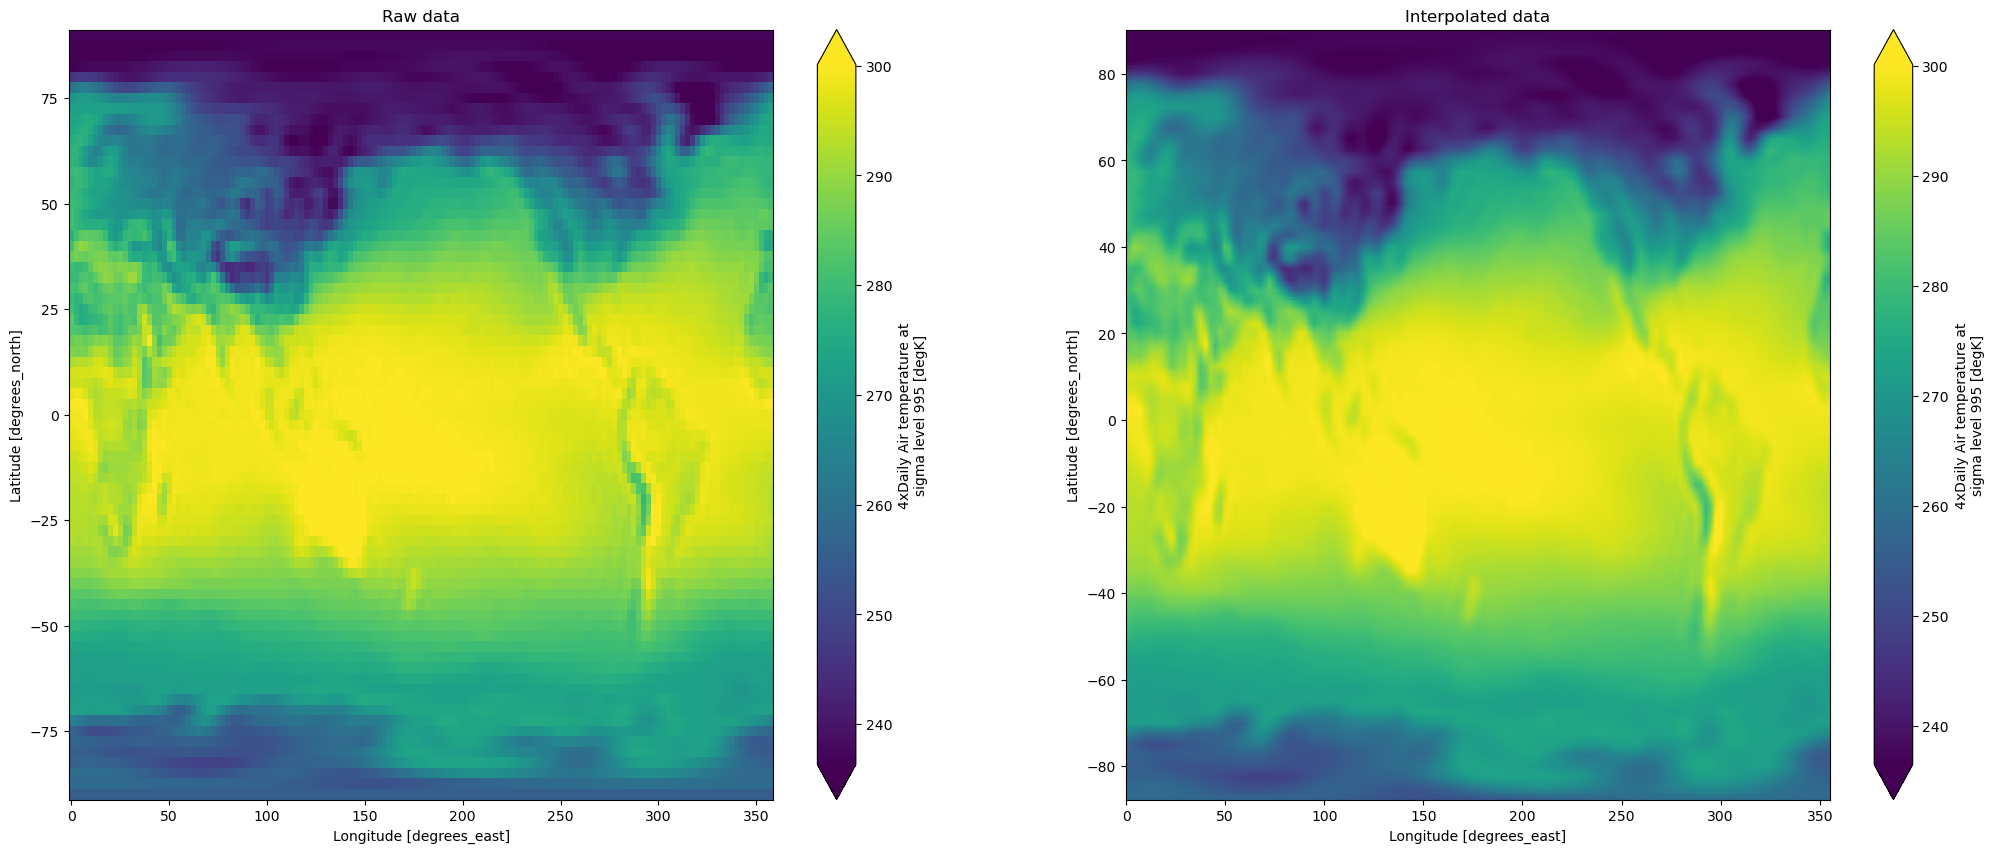

In [3]:
# Raw data

fig, axes = plt.subplots(ncols=2,figsize=(25, 10))

ds.air.plot(ax=axes[0],robust=True)

axes[0].set_title("Raw data")

new_lon = np.linspace(ds.lon[0], ds.lon[-2], ds.dims["lon"] * 5)

new_lat = np.linspace(ds.lat[0], ds.lat[-2], ds.dims["lat"] * 5)

dsi = ds.interp(lat=new_lat, lon=new_lon)

dsi.air.plot(ax=axes[1],robust=True)

axes[1].set_title("Interpolated data")

It can be observed that using spatial interpolation we have reduced the grid size and estimated the air temperature values at finer resolution!!

Advanced interpolation can be used to remap the data to the new coordinate. Consider the new coordinates x and z on the two dimensional plane. The remapping can be done as follows

In [4]:
# new coordinate

x = np.linspace(240, 300, 100)

z = np.linspace(20, 70, 100)


C:\ProgramData\Anaconda3\envs\GEODACenv\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\ProgramData\Anaconda3\envs\GEODACenv\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\ProgramData\Anaconda3\envs\GEODACenv\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\ProgramData\Anaconda3\envs\GEODACenv\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Inde

Text(0.5, 1.0, 'Remapped data')

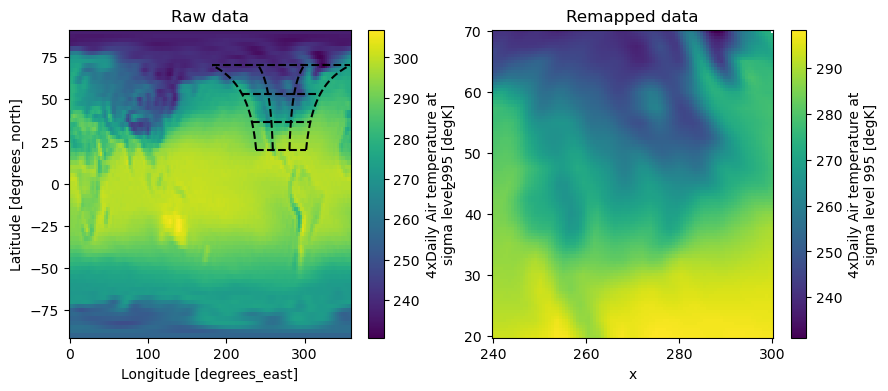

In [5]:
# relation between new and original coordinates
lat = xr.DataArray(z, dims=["z"], coords={"z": z})

lon = xr.DataArray(
    (x[:, np.newaxis] - 270) / np.cos(z * np.pi / 180) + 270,
    dims=["x", "z"],
    coords={"x": x, "z": z},
)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ds.air.plot(ax=axes[0])


# draw the new coordinate on the original coordinates.
for idx in [0, 33, 66, 99]:
    axes[0].plot(lon.isel(x=idx), lat, "--k")


for idx in [0, 33, 66, 99]:
    axes[0].plot(*xr.broadcast(lon.isel(z=idx), lat.isel(z=idx)), "--k")


axes[0].set_title("Raw data")

dsi = ds.interp(lon=lon, lat=lat)

dsi.air.plot(ax=axes[1])

axes[1].set_title("Remapped data")

### Here we have xarray dataset, let's save it as a NetCDF   

#### Saving Datasets and DataArrays to NetCDF

Saving your Datasets and DataArrays objects to NetCDF files couldn’t be simpler. The xarray module that we’ve been using to load NetCDF files provides methods for saving your Datasets and DataArrays as NetCDF files.

Here is the manual page on the subjet: http://xarray.pydata.org/en/stable/generated/xarray.Dataset.to_netcdf.html

The method ._to_netcdf( ) is available to both Datasets and DataArrays objects. 

#### Syntax

*your_dataset.to_netcdf('/your_filepath/your_netcdf_filename.nc')*

In [9]:
dsi.to_netcdf(path='C:\\(add your path)\challenge3_output.nc')
print ('finished saving')

finished saving


## Try it yourself!

#### 1. Open your data file

#### 2. If needed convert your dataset into a numpy array

#### 3. Create a simple plot

#### 4. Perform data interpolation

#### 5. Plot interpolated data 

#### 6. Remap data to new coordinates

#### 7. Draw the new coordinate on the original coordinates.

#### 8. Plot remapped data

#### 9. Save modified dataset as netCDF file